In [1]:
from collections import Counter

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet

import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

# import spacy
# nlp = spacy.load('en_core_web_lg')
# all_stop = nlp.Defaults.stop_words

import fasttext
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , ConfusionMatrixDisplay

import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim

from textblob import TextBlob
from afinn import Afinn

import lightgbm as lg
from sklearn.multiclass import OneVsRestClassifier

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to C:\Users\Selvaram
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Selvaram
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Selvaram
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Selvaram
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Selvaram
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv('final_csv_cell.csv')
df

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,Vader_Polarity,Vader_score,Vader_sentiment,clean,TextBlob_Subjectivity_clean,stop,TextBlob_Polarity_clean,TextBlob_Analysis_clean,Afinn_score,Afinn_sentiment
0,175,5.0,True,05 30 2016,AYTH0QE4MV9EP,B0006TIA8Y,k richardson,"It is much smaller than I expected it to be, l...",Cyber Power CP-H720P 7 port USB hub,1464566400,...,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.8070,positive,it is much smaller than i expected it to be lo...,0.552381,it is much smaller than i expected it to be lo...,0.178571,Positive,7.0,positive
1,176,5.0,True,04 20 2016,A3LGK02LXYMHCN,B0006TIA8Y,john burger,Works as advertised,Five Stars,1461110400,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,works as advertised,0.000000,works as advertised,0.000000,Neutral,0.0,neutral
2,177,5.0,True,04 18 2016,A4TKSZ2YBR3YJ,B0006TIA8Y,susan p,After 4 years of constant use this USB Hub sti...,Five Stars,1460937600,...,"{'neg': 0.254, 'neu': 0.57, 'pos': 0.176, 'com...",-0.1298,negative,after years of constant use this usb hub still...,0.666667,after years of constant use this usb hub still...,0.500000,Positive,0.0,neutral
3,178,4.0,True,03 29 2016,A1DTBZ64JPFNR6,B0006TIA8Y,s anshell,nice extends your usb ports needs its own power,Four Stars,1459209600,...,"{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp...",0.5106,positive,nice extends your usb ports needs its own power,1.000000,nice extends your usb ports needs its own power,0.600000,Positive,4.0,positive
4,179,5.0,True,03 25 2016,AK1IACPO0M4EH,B0006TIA8Y,d abbott,Works like a charm.,Five Stars,1458864000,...,"{'neg': 0.0, 'neu': 0.161, 'pos': 0.839, 'comp...",0.6369,positive,works like a charm,0.000000,works like a charm,0.000000,Neutral,5.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127466,212818,1.0,True,10 20 2016,A2LGOB7B7UEVEU,B01HGSIFM8,william ridings,Very cheap..... they also do not fast charge. ...,waste of money,1476921600,...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.4215,negative,very cheap they also do not fast charge false ...,0.527500,very cheap they also do not fast charge false ...,-0.045000,Negative,-2.0,negative
127467,212819,1.0,True,10 13 2016,A2RI1XFFR04TIV,B01HGSIFM8,rodriquez,Brought a ten pack only 2 worked and they only...,On top of that they charged slow definitely no...,1476316800,...,"{'neg': 0.205, 'neu': 0.61, 'pos': 0.185, 'com...",-0.2462,negative,brought a ten pack only worked and they only w...,0.430000,brought a ten pack only worked and they only w...,0.011429,Positive,-2.0,negative
127468,212820,2.0,True,09 19 2016,A7AQ5EUUIP6MT,B01HGSIFM8,valentine gomes,Half of the cords didn't work. Tried to contac...,Tried to contact amazon to have the bad one re...,1474243200,...,"{'neg': 0.109, 'neu': 0.825, 'pos': 0.066, 'co...",-0.2263,negative,half of the cords didn t work tried to contact...,0.416667,half of the cords didn t work tried to contact...,-0.433333,Negative,-3.0,negative
127469,212821,1.0,True,08 26 2016,A2U1XECJ7ZD7Q2,B01HGSIFM8,jason kinnison,"Out of the 10 cables, 2 work. The first one I...","Total crap, look elsewhere.",1472169600,...,"{'neg': 0.0, 'neu': 0.91, 'pos': 0.09, 'compou...",0.7964,positive,out of the cables work the first one i used it...,0.666667,out of the cables work the first one i used it...,0.350000,Positive,5.0,positive


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
neutral = np.where((df['Vader_score']<0.05) & (df['Vader_score']>-0.05))

In [5]:
abc = neutral[0]

In [6]:
df.loc[abc,'Vader_sentiment']='neutral'

In [7]:
df.to_csv('Cell_Phones_and_accessories_Dataset.csv')

********** fasttext results **********
precision 0.7764600334283748
Recall 0.7764600334283748
f1_score 0.7764600334283748
                   precision    recall  f1-score   support

__label__Negative       0.81      0.80      0.80     31459
 __label__Neutral       0.71      0.78      0.74     31459
__label__Positive       0.84      0.74      0.79     18450

         accuracy                           0.78     81368
        macro avg       0.79      0.77      0.78     81368
     weighted avg       0.78      0.78      0.78     81368



0.7764600334283748

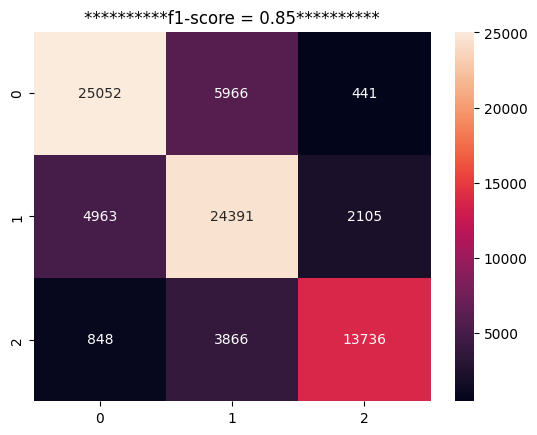

In [8]:
def cleaning(text):
    text = text.lower()
    text = re.sub(r'https?\S+ | www\S+' , ' ' , text)
    text = re.sub(r'[^a-z]+' , ' ' , text)
    text = re.sub(r'\s+' , ' ' , text)
    return text

df['reviewText'] = df['reviewText'].apply(cleaning)
df_3_class = df.copy()
df_3_class.loc[(df_3_class['overall']== 1.0) , 'overall_2.0'] = 'Negative'
df_3_class.loc[(df_3_class['overall']== 2.0) , 'overall_2.0'] = 'Negative'
df_3_class.loc[(df_3_class['overall']== 3.0) , 'overall_2.0'] = 'Neutral'
df_3_class.loc[(df_3_class['overall']== 4.0) , 'overall_2.0'] = 'Positive'
df_3_class.loc[(df_3_class['overall']== 5.0) , 'overall_2.0'] = 'Positive'

df_3_class_pos  = df_3_class[df_3_class['overall_2.0'] == 'Positive']
df_3_class_neg  = df_3_class[df_3_class['overall_2.0'] == 'Negative']
df_3_class_neu  = df_3_class[df_3_class['overall_2.0'] == 'Neutral']

df_3_class_neu2 = df_3_class_neu.sample(n=157296 , random_state = 42 , replace = True)
df_3_class_neg2 = df_3_class_neg.sample(n=157296 , random_state = 42 , replace = True)

df_3_class_2 = pd.concat([df_3_class_pos,df_3_class_neg2,df_3_class_neu2])


df_3_class_2['Target_2.0'] = '__label__' + df_3_class_2['overall_2.0'].astype(str)
df_3_class_2['Target_review_2.0'] = df_3_class_2['Target_2.0'] + ' ' + df_3_class_2['reviewText']
train_3 , test_3 = train_test_split(df_3_class_2[['Target_2.0' , 'Target_review_2.0']], test_size=0.2 , stratify = df_3_class_2['Target_2.0'])
train_3.to_csv("cell_phones_train_3.txt", columns=["Target_review_2.0"], index=False, header=False)
test_3.to_csv("cell_phones_test_3.txt", columns=["Target_review_2.0"], index=False, header=False)
model_3 = fasttext.train_supervised(input="cell_phones_train_3.txt")
model_3.test("cell_phones_test_3.txt")
test_num , precision_3 ,recall_3 = model_3.test("cell_phones_test_3.txt")
f1_score_3 = (2*precision_3*recall_3)/(precision_3+recall_3)
print('*'*10,'fasttext results','*'*10)
print('precision',precision_3)
print('Recall',recall_3)
print('f1_score',f1_score_3)

confu_3 = pd.DataFrame()
confu_3['labeled'] = test_3['Target_2.0']

from sklearn.metrics import confusion_matrix
confu_3["predicted_3"] = test_3["Target_review_2.0"].apply(lambda x: model_3.predict(x)[0][0])
# predict the data

plt.title('**********Confusion matrix of fasttext**********')
plt.title('**********f1-score = 0.77**********')
sns.heatmap(confusion_matrix(confu_3["labeled"], confu_3["predicted_3"]) , annot = True ,fmt = 'd')
print(classification_report(confu_3["labeled"], confu_3["predicted_3"]))

f1_score_3

In [13]:
from PIL import ImageTk,Image

In [61]:
from tkinter import *

def myfun():
    x = e1.get()
    #y = sent.polarity_scores(x)
    y = model_3.predict(x)
    a = y[0]
    if a[0]=='__label__Positive':
        l3.config(text = 'Your Predicted Sentiment of given review is Positive')
    elif a[0]=='__label__Negative':
        l3.config(text = 'Your Predicted Sentiment of given review is Negative')
    else:
        l3.config(text = 'Your Predicted Sentiment of given review is Neutral')

window = Tk()

# Title
window.title('Welcome to sentiment Analysis')

# Windowsize
window.minsize(width = 200 , height = 200)

# Background
#window.configure(background='black')

# label
# l1 = Label(window , text = 'Amazon customer review sentiment identifier',font=50 , bg = 'pink' , fg = 'black')
# l1.pack()

# Image
img = ImageTk.Image.open('Amazon Logo.png')
resized_img = img.resize((1000,350))
p1 = ImageTk.PhotoImage(resized_img)
l2 = Label(window , image=p1)
l2.pack()

# label: Enter the text
l1 = Label(window , text = 'Enter the review text:',font=50 , fg = 'black')
l1.pack(pady=30)

# Entry
e1 = Entry(window, width = 50 , bd = 5 , font = ("Calibri",20))
e1.pack(pady=15, ipady = 10)

# Button
b1 = Button(window , text = 'Click here to Analyze' ,font = 50, bg = 'green' , fg = 'black' , width = 30 , height = 3 , command = myfun)
b1.pack(pady=10)

# label 3
l3 = Label(window , text = 'Your Result',font=20 , fg = 'orange')
l3.pack(pady=10)

window.mainloop()